# Multi-Qubit Systems
<hr></hr>

Now that we have the complete definition for a [single qubit]((https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html#kets-bras-products-and-bases)), in this chapter we will generalize this idea to statevectors representing several qubits. We will also discuss multi-qubit quantum gates, introduce the [no-cloning theorem](https://en.wikipedia.org/wiki/No-cloning_theorem), briefly cover the concept of a [universal gate-set](https://en.wikipedia.org/wiki/Quantum_logic_gate#Universal_quantum_gates), and expand on the concept of measurement for multi-qubit systems.

## 1. Multi-Qubit States

In the previous chapter, we went over the details of why a qubit is represented by a vector of the form:

$$|q\rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix}, $$

where $\alpha_0$ and $\alpha_1$ are complex numbers known as probability amplitudes, and whose modulus square represents the probability of measuring each of their corresponding state, and therefore must add up to $1$: 

$$|\alpha_0|^2 + |\alpha_1|^2 = 1 .$$

We also briefly discussed that a state of this form corresponds to a linear combination of the computational basis states $\{|0\rangle, |1\rangle\} $:

$$
\begin{aligned}
|q\rangle &= \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix} 
\\
\\
|q\rangle &= \alpha_0 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \alpha_1 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
|q\rangle &= \alpha_0 |0\rangle + \alpha_1 |1\rangle.
\end{aligned}
$$

We can then generalize this expression for $n$ qubits by taking a linear combination of all possible basis states for the complete system: $\{|0\rangle, |1\rangle\}^{\otimes n}$. Here, the superscript $^{\otimes n}$ denotes that we are taking the tensor product $n$ times for all possible combinations of $|0\rangle$ and $|1\rangle$:

$$\{|0\rangle, |1\rangle\}^{\otimes n} = \{|\underbrace{0\dots 00}_{n}\rangle, |\underbrace{0\dots 01}_{n}\rangle, \dots, |\underbrace{1\dots 11}_{n}\rangle \}$$

For example, for $n = 3$:

$$\{|0\rangle, |1\rangle\}^{\otimes3} = \{|000\rangle, |001\rangle, |010\rangle, |011\rangle, |100\rangle, |101\rangle, |110\rangle, |111\rangle \} .$$

It can be seen that for $n$ qubits, there are a total of $N = 2^n$ basis states. So, the general representation of a quantum state for an $n$-qubit system is given by:

$$ |q\rangle = \alpha_{0} |0\dots 00\rangle + \alpha_{1}|0\dots 01\rangle + \dots + \alpha_{N-1}|1 \dots 11\rangle ,$$

where $\alpha_j \in \mathbb{C}$ are the probability amplitudes associated with each basis state. And since their square modulus $|\alpha_j|^2$ represent probabilities, they must also meet the condition of adding up to $1$:

$$ \sum_{j=0}^{N-1} |\alpha_j|^2 = 1 .$$

A more compact way to write the expresion for a multi-qubit vector is:

$$ |q\rangle = \sum_{j=0}^{N-1} \alpha_{j} |j\rangle. $$

However, we do have to point out that this is a slight abuse of notation because, here $j$ represents an integer between $0$ and $2^{N-1}$, so we need to clarify what we mean by $|j\rangle$ is the state with binary label that corresponds to that integer value. For example, for $j = 5$:

$$ |5\rangle \sim |101\rangle = |1\rangle \otimes |0\rangle \otimes |1\rangle .$$

It is also important to remember that, just as for the single-qubit case, the basis states $\{|0\rangle, |1\rangle\}^{\otimes n}$ form an orthonormal basis because they meet the condition of being orthogonal to each other and normalized. A succinct form to express this is as:

$$ \langle i | j \rangle = \delta_{ij}$$

where $i, j$ denote any of the possible basis states between $0$ and $2^{N-1}$, and $\delta_{ij}$ is known as the Kronecker-delta function, given by:

$$ \delta_{ij} = 
\begin{cases} 
1 \text{, for } i = j 
\\
\\
0 \text{, for } i \neq j
\end{cases} 
$$

We can also represent a general multi-qubit statevector using column-vector notation as:

$$ |q\rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}, \text{ such that:} \; \alpha_j \in \mathbb{C}, \; \text{and} \; \sum_{j=0}^{N-1}|\alpha_j|^2 = 1 . $$

And just like we did for the one-qubit case, we say that all statevectors of this kind belong to a [Hilbert space](https://en.wikipedia.org/wiki/Hilbert_space) but now of size $N = 2^n$, which is often expressed as $\mathcal{H}_2^{\otimes n}$. The subscript $2$ is to denote this is for a $2$-level (qubit) system, and the superscript $^{\otimes n}$ is to express that we have $n$ of these systems.

Let's now look at a few examples of multi-qubit statevectors in Qiskit.

In [1]:
import numpy as np
import sympy as sp
from qiskit.quantum_info import Statevector

In [2]:
# Create equal superposition state for 3 qubits (separable)
ψ_a = Statevector.from_label('+++')

# Display statevector in ket notation
print('Ket notation:')
display(ψ_a.draw('latex'))

# Display statevector in vector notation
print('Vector notation:')
display(ψ_a.draw('latex', convention='vector'))

Ket notation:


<IPython.core.display.Latex object>

Vector notation:


<IPython.core.display.Latex object>

In [3]:
# Create 3-qubit entangled state
ψ_b = 1/np.sqrt(2)*Statevector.from_label('000') + 1/np.sqrt(2)*Statevector.from_label('111')

# Display statevector in ket notation
print('Ket notation:')
display(ψ_b.draw('latex'))

# Display statevector in vector notation
print('Vector notation:')
display(ψ_b.draw('latex', convention='vector'))

Ket notation:


<IPython.core.display.Latex object>

Vector notation:


<IPython.core.display.Latex object>

As can be seen from these examples, both separable and entangled states consists of linear combinations of basis states. It is the value that each probability amplitude takes that ultimately determines if a state is separable of entangled. If the state of an $n$-qubit system can be ultimately factorized into a **single** term of tensor products for $n$ separate states, we say the state is separable: 

$$ |q\rangle = |q_{n-1}\rangle \otimes \dots \otimes |q_1\rangle \otimes |q_0\rangle .$$

On the other hand, if a state can only be expressed as a sum of tensor products (i.e., cannot be factorized like shown above), we say the state is entangled.

Figuring out if a state can be factorized by inspection gets increasingly difficult when the number of qubits increases. Therefore, there are procedures that allow one to, not only discern if a state is entangled, but also to quantify its level of entanglement. However, the subject of measures of entanglement is quite diverse and a bit advanced, so we will cover some of these details in a later chapter on quantum information theory.

## 2. Multi-Qubit Gates

Just as we pointed out for the [single-qubit case](https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html#generalizing-quantum-gates), multi-qubit gates and circuits can be expressed in the form of a [unitary matrix](https://en.wikipedia.org/wiki/Unitary_matrix) $U$, such that:

$$ UU^\dagger = U^\dagger U = I .$$

For a system of $n$ qubits, the matrices will be of size $N \times N$, with $N = 2^n$:

$$ U = \begin{bmatrix}u_{0,0} & u_{0,1} & \dots & u_{0,(N-1)} \\
                      u_{1,0} & u_{1,1} & \dots & u_{1,(N-1)} \\
                      \vdots & \vdots & \ddots & \vdots \\
                      u_{(N-1),0} & u_{(N-1),1} & \dots & u_{(N-1),(N-1)}
\end{bmatrix} $$

For the specific case of multi-qubit systems composed solely of single-qubit gates acting on each individual qubit, it is easy to compute the total unitary matrix that acts on the whole system by taking the Kronecker product between the individual one-qubit operations. However, these separable operations cannot be used to generate entangled states, and therefore correspond to only limited subset of all possible unitaries that can act on a given Hilbert space.

### 2.1 One-Qubit Gates (on Multiple Qubits)

Similar to what we saw for classical reversible circuits, gates acting on $n$ individual qubits that are part of a larger multi-qubit system can be combined into a single unitary by taking the Kronecker product between them:

$$ U = \bigotimes_{j=1}^{n} U_{n-j} .$$

Let's look at an example in Qiskit where we apply gates $X, H, Z$ on qubits $0$, $1$ and $2$, respectively:

$$ U = Z \otimes H \otimes X .$$

We will first create the individual matrices for each gate and apply the Kronecker (tensor) product between them, and compare this with the total unitary (operator) for the whole circuit.

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

In [5]:
# Compute total Unitary (operator) by tensoring gates
X = Operator.from_label('X')
H = Operator.from_label('H')
Z = Operator.from_label('Z')

ZHX = Z.tensor(H.tensor(X))
ZHX.draw('latex', prefix='U =')

<IPython.core.display.Latex object>

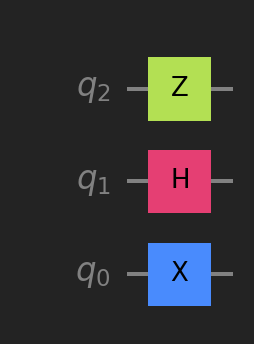

In [6]:
qc = QuantumCircuit(3)
qc.x(0)
qc.h(1)
qc.z(2)
qc.draw()

In [7]:
# Operator from total circuit matches that of tensor product of individual matrices
Operator(qc).draw('latex', prefix='U =')

<IPython.core.display.Latex object>

Unitaries composed of tensor products of single-qubit unitaries are only a small fraction of all possible operations that can act on a multi-qubit state. For example the matrices for the $CX$ or the Toffoli ($CCX$) gates, which we covered before, cannot be expressed in terms of tensor products of other unitaries. Since there is an infinite number of unitaries that can be implemented for any given qubit system, we will focus our attention on a few popular/common gates. However, any multi-qubit unitary can actually be decomposed into combinations of other gates that are part of what is known as a [universal gate-set](https://en.wikipedia.org/wiki/Quantum_logic_gate#Universal_quantum_gates). In other words, we can approximate with arbitrary precision any unitary of size $N \times N$ by combining operations from small set of single-qubit and two-qubit gates.

### 2.2 Multi-Qubit Gates

Multi-qubit gates that cannot be expressed as a single tensor product of individual qubit gates (like the ones described in the previous section) are sometimes referred as **entangling gates**. This is because, as the name implies, they can be used to construct circuits that allow us to generate entangled states. Probably the most common type of entangling gates are controlled gates, which are a generalization of the of the controlled $X$ gates we've discussed before.

#### 2.2.1 Controlled Gates
Just like the $CX$ gate is a controlled version of an $X$ gate, we can expand any other gate with a unitary $U$ into a controlled version of it. The idea is that the gate of interest gets applied to a **target** set of qubits if a certain condition is met in a set of **control** qubits. 

For example, in the case of a $CX$ gate:
1. An $X$ gate is applied to the target qubit if the control qubit is in state $|1\rangle$.
2. An $I$ gate is applied to the target qubit if the control qubit is in state $|0\rangle$.

And the way we constructed the matrix for this gate [before](https://learnquantum.io/chapters/01_classical_computing/01_03_bits_to_vectors.html#multi-bit-gates-and-circuits-as-matrices), was by looking at the vectors for every combination of input and output qubits, and solving for each matrix element. 

Alternatively, we can construct the unitary matrix of the $CX$ gate by combining the gates acting on the target qubit ($X$ and $I$) with the projector operators ($\Pi_0$ and $\Pi_1$) we introduced in [the previous chapter](https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html#kets-bras-products-and-bases). For example, given the two-qubit state $|q_1 q_0\rangle$, we can construct a following 2-qubit operator that applies an $X$ gate to $q_0$ only if $q_1$ is $|1\rangle$ and add it to an operator that applies the identity $I$ to $q_0$ only if $q_1$ is $|0\rangle$:

$$ 
\begin{aligned}
CX &= \Pi_0 \otimes I + \Pi_1 \otimes X
\\
\\
CX &= |0\rangle \langle 0| \otimes I + |1\rangle \langle 1| \otimes X .
\end{aligned}
$$

Consider the case in which we have $|q_1 q_0\rangle = |0\rangle \otimes |q_0\rangle$. The expectation is that a $CX$ gate on this state, will result in applying an identity to the target qubit $|q_0\rangle$:

$$
\begin{aligned}
CX |q_1 q_0 \rangle &= (|0\rangle \langle 0| \otimes I + |1\rangle \langle 1| \otimes X)|0\rangle \otimes |q_0\rangle
\\
\\
CX |q_1 q_0 \rangle &= |0\rangle \langle 0|0\rangle \otimes I|q_0\rangle + |1\rangle \langle 1|0\rangle \otimes X|q_0\rangle
\\
\\
CX |q_1 q_0 \rangle &= |0\rangle \otimes I|q_0\rangle .
\end{aligned}
$$

We can follow the same procedure to show that, if $|q_1 q_0\rangle = |1\rangle \otimes |q_0\rangle$ we will get $CX |q_1 q_0 \rangle = |1\rangle \otimes X|q_0\rangle$, as expected.

We can also show that the expression above for the $CX$ gate does indeed give us the right matrix. Let's use Qiskit to do this:

In [8]:
from qiskit.quantum_info import Operator

In [9]:
Π0 = Operator.from_label('0')
Π1 = Operator.from_label('1')
I = Operator.from_label('I')
X = Operator.from_label('X')

CX = Π0.tensor(I) + Π1.tensor(X)

CX.draw('latex', prefix='CX = ')

<IPython.core.display.Latex object>

As expected, the matrix above matches the unitary for the $CX$ gate:

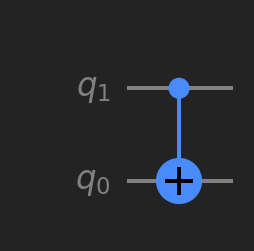

<IPython.core.display.Latex object>

In [10]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
Operator(qc).draw('latex', prefix='CX = ')

What is convenient about the sum-of-operators representation we used above, is that we can replace the $X$ gate with any other unitary $U$. For example, the controlled $Z$ gate ($CZ$) applies a $Z$ gate to the target qubit when the control qubit is in state $|1\rangle$. So we can construct its unitary operator as:

$$ CZ = \Pi_0 \otimes I + \Pi_1 \otimes Z .$$

And again, let's use Qiskit to look at the matrix for this gate:

In [11]:
Z = Operator.from_label('Z')

CZ = Π0.tensor(I) + Π1.tensor(Z)
CZ.draw('latex', prefix='CZ = ')

<IPython.core.display.Latex object>

As we can see, this is a diagonal matrix, with ones in the diagonal, but for which the last entry has a value of $-1$. What this means is that, this unitary maps all two-qubit basis states to themselves, except for state $|11\rangle$, for which a phase of $-1$ is introduced:

$$
\begin{aligned}
&|00\rangle \xrightarrow{\;\; \text{CZ} \;\;} \phantom{-}|00\rangle
\\
&|01\rangle \xrightarrow{\;\; \text{CZ} \;\;} \phantom{-}|01\rangle
\\
&|10\rangle \xrightarrow{\;\; \text{CZ} \;\;} \phantom{-}|10\rangle
\\
&|11\rangle \xrightarrow{\;\; \text{CZ} \;\;} -|11\rangle
\end{aligned}
$$


We can see this in action by placing a state in equal superposition and then applying the $CZ$ gate:

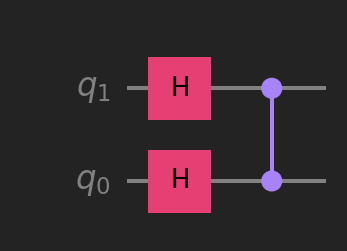

<IPython.core.display.Latex object>

In [12]:
qc = QuantumCircuit(2)
qc.h(range(2))
qc.cz(1,0)
display(qc.draw())
Statevector(qc)

An interesting observation is that the $CZ$ gate is drawn without the typical "box" denoting the $Z$ gate on $q_0$ that is being controlled by $q_1$. This is because this gate is symmetric in the sense that swapping the control with the target qubit (i.e. making $q_0$ the control and $q_1$ the target) results in the same unitary matrix.

Similar to what we did with the $Z$ gate, we can follow the same procedure for any other gate, like for example, parametrized gates such as a the controlled versions of $RX(\theta), RY(\theta), RZ(\varphi)$, or the controlled phase gate $CP(\varphi)$:

$$ CP(\varphi) = \Pi_0 \otimes I + \Pi_1 \otimes P(\varphi) .$$

We can also easily construct controlled gates for which the control value that activates the target gate is different. For example we could implement a controlled-X gate, but where the $X$ gets applied if the control qubit is in state $|0\rangle$. All we need to do is swap the projection operators in our definition:

$$\overline{C}X = \Pi_1 \otimes I + \Pi_0 \otimes X .$$

The bar on top of the $C$ is to express that the gate is activated when the control is in the $|0\rangle$ state rather than $|1\rangle$.

In Qiskit, one can switch the control condition of a `cx` gate by using the `ctrl_state` argument:

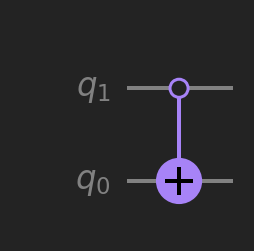

<IPython.core.display.Latex object>

In [13]:
qc = QuantumCircuit(2)
qc.cx(1,0,ctrl_state='0')
display(qc.draw())
Operator(qc).draw('latex', prefix='\\overline{C} X = ')

It is also worth noting that the above is equivalent to simply negating the control qubit before applying a conventional $CX$ gate, and then negating it again to restore its original value:

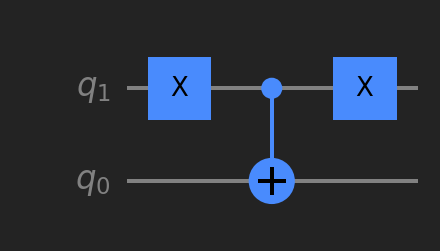

<IPython.core.display.Latex object>

In [14]:
qc = QuantumCircuit(2)
qc.x(1)
qc.cx(1,0)
qc.x(1)
display(qc.draw())
Operator(qc).draw('latex', prefix='\\overline{C} X = ')

We can then expand these ideas to more than just two qubits. Let us, for example, revisit the Toffoli ($CCX$) gate, where:

1. An $X$ gate is applied to the target qubit if the control qubits are in state $|11\rangle$.
2. An $I$ gate is applied to the target qubit if the control qubits are any other basis state, i.e. $|00\rangle, |01\rangle, |10\rangle$.

Therefore, we express this unitary operation as:

$$ 
\begin{aligned}
CCX &= |00\rangle \langle 00| \otimes I +  |01\rangle \langle 01| \otimes I + |10\rangle \langle 10| \otimes I + |11\rangle \langle 11| \otimes X
\\
\\
CCX &= (\Pi_{00} + \Pi_{01} + \Pi_{10}) \otimes I + \Pi_{11} \otimes X .
\end{aligned}
$$

And of course, we can implement modifications of it, such as the case where the target gate gets activated when the control qubits are in, for example, state $|10\rangle$:

$$ C\overline{C}X = (\Pi_{00} + \Pi_{01} + \Pi_{11}) \otimes I + \Pi_{10} \otimes X .$$

In Qiskit, we use the same argument to specify the control state:

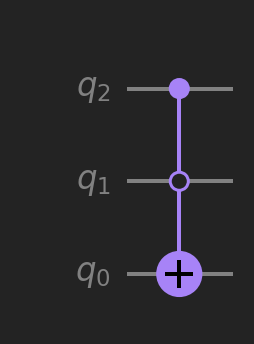

<IPython.core.display.Latex object>

In [15]:
qc = QuantumCircuit(3)
qc.ccx(1,2,0,ctrl_state='10')
display(qc.draw())
Operator(qc).draw('latex', prefix='C\overline{C}X = ')

Lastly, we can also use this representation of controlled gates to find the unitary matrix for when the control and target qubits are not adjacent. Let's, for example, consider the case of a $CZ$ where the control is on $|q_2\rangle$ and the target on $|q_0\rangle$ of a three-qubit system:

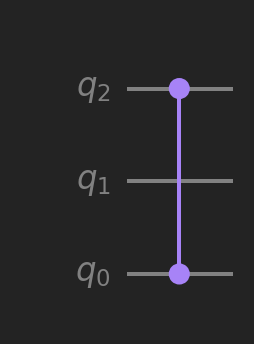

<IPython.core.display.Latex object>

In [16]:
qc = QuantumCircuit(3)
qc.cz(2,0)
display(qc.draw(idle_wires=True))
Operator(qc).draw('latex',prefix='CZ_{20} = ')

The way we would construct this matrix is by inserting an identity operator in between the tensor products of projection operators acting on the control qubit, and the target operators acting on the target qubit:

$$ CZ_{20} = \Pi_0 \otimes \underset{\substack{\uparrow}}I \otimes I + \Pi_1 \otimes \underset{\substack{\uparrow}}I \otimes Z .$$

#### 2.2.2 The SWAP Gate

Another important entangling gate is the $\text{SWAP}$ gate, which literally swaps the state between two qubits:

$$
\begin{aligned}
|00\rangle \xrightarrow{\;\; \text{SWAP} \;\;} |00\rangle
\\
|01\rangle \xrightarrow{\;\; \text{SWAP} \;\;} |10\rangle
\\
|10\rangle \xrightarrow{\;\; \text{SWAP} \;\;} |01\rangle
\\
|11\rangle \xrightarrow{\;\; \text{SWAP} \;\;} |11\rangle
\end{aligned}
$$

We can generate its corresponding unitary matrix for this operation using Qiskit:

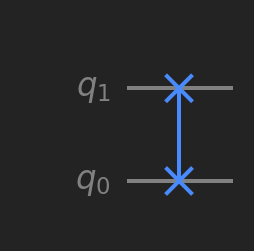

<IPython.core.display.Latex object>

In [17]:
qc = QuantumCircuit(2)
qc.swap(1,0)
display(qc.draw())
Operator(qc).draw('latex',prefix='\\text{SWAP} = ')

A $\text{SWAP}$ gate can be in fact decomposed into three $CX$ gates as follows:

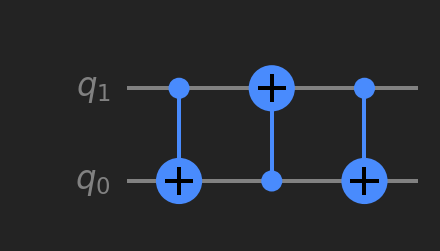

<IPython.core.display.Latex object>

In [18]:
qc = QuantumCircuit(2)
qc.cx(1,0)
qc.cx(0,1)
qc.cx(1,0)
display(qc.draw())
Operator(qc).draw('latex',prefix='\\text{SWAP} = ')

The logic for why this works is the same as that of the [XOR SWAP trick](https://en.wikipedia.org/wiki/XOR_swap_algorithm) used in computer programming (recall that a $CX$ gate is equivalent to reversible $\mathsf{XOR}$).

The controlled version of a $\text{SWAP}$ gate ($C\text{SWAP}$) is also known as the [Fredkin gate](https://en.wikipedia.org/wiki/Fredkin_gate), and basically swaps two qubits conditioned on the state of a third (control) qubit:

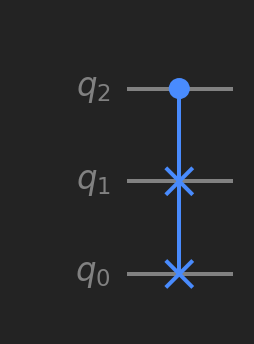

<IPython.core.display.Latex object>

In [19]:
qc = QuantumCircuit(3)
qc.cswap(2,1,0)
display(qc.draw())
Operator(qc).draw('latex', prefix='C \\text{SWAP} = ')

### 2.3 The Copy Gate (No-Cloning Theorem)

An operation we introduced in the chapter on reversible classical computing was one with the ability to copy the value of a bit (say, $b_1$) to another (e.g., $b_0$) by the use of a $CX$ gate. Since qubits that are in strictly one of the two computational basis states $\{|0\rangle, |1\rangle \}$ behave just like classical bits, we can effectively copy a qubit in the same way:

<img src="images/02_04_01_copy_1.png" align = "center" width="500"/>

So, given two qubits $|q_1\rangle, |q_0\rangle$, we can copy the state of $|q_1\rangle$ onto $|q_0\rangle$ using a $CX$ gate, provided that $|q_0\rangle$ is initialized at $|0\rangle$, and the state of $|q_1\rangle$ (denoted as $|\psi\rangle$) is one of the computational basis states:

$$ |q_1 q_0\rangle = |\psi \rangle \otimes |0\rangle \xrightarrow{\; CX \;} |\psi \rangle \otimes |\psi \rangle, \; \text{ provided} \; |\psi \rangle \in \{|0\rangle, |1\rangle\} .$$

The question then is, can we construct a copy gate $\Theta$ that, given the general qubit state $|\psi\rangle \in \mathcal{H}_2$, produces the exact same state on an another qubit?

<img src="images/02_04_02_copy_2.png" align = "center" width="500"/>

In other words, what we want is for $\Theta$ to take a general superposition state $|\psi\rangle = \alpha_0|0\rangle + \alpha_1|1\rangle$ and copy it from one qubit to another as follows:

$$
\begin{aligned}
|\psi\rangle \otimes |0\rangle &\xrightarrow{\; \Theta \; \,} |\psi\rangle \otimes |\psi\rangle
\\
\\
(\alpha_0|0\rangle + \alpha_1|1\rangle) \otimes |0\rangle &\xrightarrow{\; \Theta \; \,} (\alpha_0|0\rangle + \alpha_1|1\rangle) \otimes (\alpha_0|0\rangle + \alpha_1|1\rangle)
\\
\\
\alpha_0|00\rangle + \alpha_1|10\rangle &\xrightarrow{\; \Theta \; \,} \alpha_0^2|00\rangle + \alpha_0\alpha_1|01\rangle + \alpha_1\alpha_0|10\rangle + \alpha_1^2|11\rangle .
\end{aligned}
$$

We can show that this copy operation is indeed satisfied for the basis states. For the case in which we want to copy state $|0\rangle$, we have $\alpha_0 = 1$ and $\alpha_1 = 0$, which correctly results in:

$$ |00\rangle \xrightarrow{\; \Theta \; \,} |00\rangle $$

And for the case in which we want to copy state $|1\rangle$, we instead have $\alpha_0 = 0$ and $\alpha_1 = 1$, which results in:

$$ |10\rangle \xrightarrow{\; \Theta \; \,} |11\rangle $$

However, since unitary operations are linear, passing a superposition of states $|00\rangle$ and $|10\rangle$ through $\Theta$ should result in a superposition of states $|00\rangle$ and $|11\rangle$:

$$\alpha_0|00\rangle + \alpha_1|10\rangle \xrightarrow{\; \Theta \; \,} \alpha_0|00\rangle + \alpha_1|11\rangle . $$

This result then places a strong constraint on the values $\alpha_0$ and $\alpha_1$ can take. Equating this output expression with the one we got for the general copying operation we get:

$$\alpha_0|00\rangle + \alpha_1|11\rangle = \alpha_0^2|00\rangle + \alpha_0\alpha_1|01\rangle + \alpha_1\alpha_0|10\rangle + \alpha_1^2|11\rangle, $$

which **only** holds for when $(\alpha_0 = 1, \alpha_1 = 0)$ or $(\alpha_1 = 0, \alpha_1 = 1)$, but not otherwise. However, what we wanted was for $\Theta$ to be able to copy a state for any possible value of $\alpha_0$ and $\alpha_1$!

This impossibility of copying an arbitrary state $|\psi\rangle$ is known as the [non-cloning theorem](https://en.wikipedia.org/wiki/No-cloning_theorem), and it is one of the most important results in the field of quantum information.

### 2.4 Universal Gate Sets

An important aspect about quantum computing is that, depending on the type of hardware implementation (e.g. superconducting qubits, ion traps, etc.), the gates available to construct our circuits is limited to a subset of operations known as the basis gate-set. A gate-set that can implement any other unitary with arbitrary precision is known as a [universal gate-set](https://en.wikipedia.org/wiki/Quantum_logic_gate#Universal_quantum_gates). 

In most of today's quantum devices, basis gate-sets are composed of one-qubit and two-qubit gates. Furthermore, the majority of these systems allow for continous-valued parametrized gates in one or more of their basis gates. This enables the precise control needed to build any other unitary gate or circuit. For instance, a valid gate-set could be composed of the gates $\{CX, SX, RZ(\theta) \}$, where the $RZ$ gate is parameterized by an angle $\theta$ that can take continuous values.

Let's take as an example a Toffoli ($CCX$) gate, which is a 3-qubit gate. This gate would have to be decomposed into gates that belong to the gate-set above in order to run on a particular quantum processor. Here is an example in Qiskit of how the $CCX$ gate can be represented in terms of these gates:

In [20]:
from qiskit import transpile 

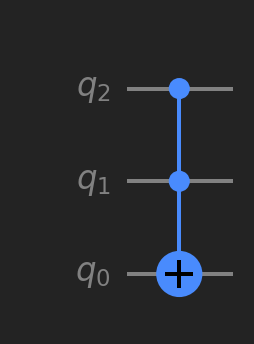

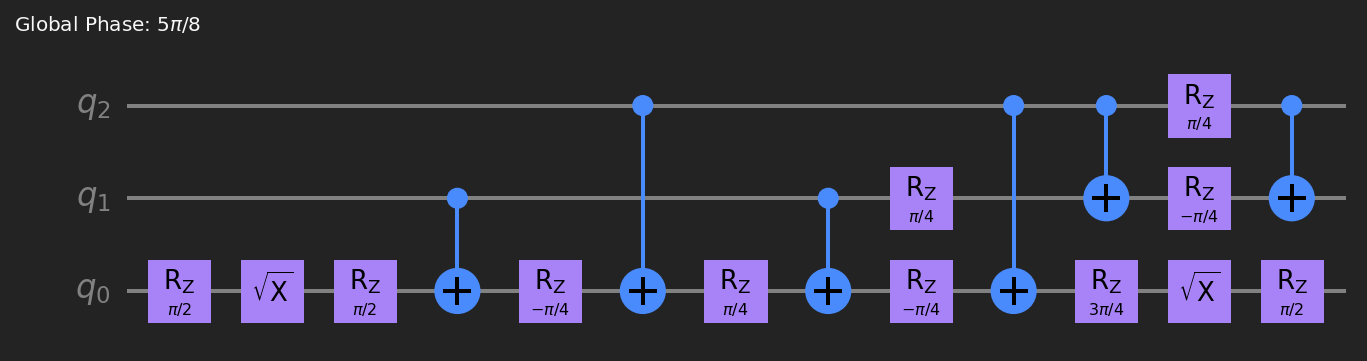

<IPython.core.display.Latex object>

In [21]:
qc = QuantumCircuit(3)
qc.ccx(2,1,0)
display(qc.draw())

qc_t = transpile(qc, basis_gates=['cx', 'sx', 'rz']) # Converts arbitrary circuit to a given basis gate-set
display(qc_t.draw())

Operator(qc).draw('latex', prefix='CCX = ')

Since quantum operations in current state-of-the-art devices are still very prone to noise, minimizing the number of gates in a circuit is of extreme importance. As the field advances, circuit compilers--which are responsible of translating an arbitrary circuit onto the basis gate-set of some specific hardware--are continuously improving at generating optimized circuits. However, it is always important to make sure that every circuit is application-aware, meaning that we always try to implement circuits that minimize the number of basis gates. 

Here's a clear example. The Toffoli gate ($CCX$) flips a target qubit whenever both of the control qubits are in state $|1\rangle$. However, it does so without introducing a relative phase between different basis states. In certain applications, adding a relative phase might not be detrimental to the final computation, so we could use another circuit that uses less gates than a $CCX$ gate. The [Margolus gate](https://en.wikipedia.org/wiki/Toffoli_gate#Related_logic_gates) (also known as the simplified Toffoli, or relative-phase-Toffoli, or $RCCX$ gate), is precisely an example of this. It acts like the $CCX$, but respectively adds phases of $-1, i, -i$ to states $|101\rangle, |110\rangle, |111\rangle$. The advantage though is that it requires a significantly less number of basis gates to implement. 

The code below in shows the decomposed Margolus gate onto the $\{CX, SX, RZ(\theta) \}$ gate-set. It can be seen that the number of required gates is significantly smaller than what we had for the $CCX$ gate:

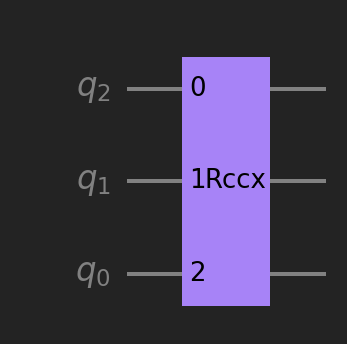

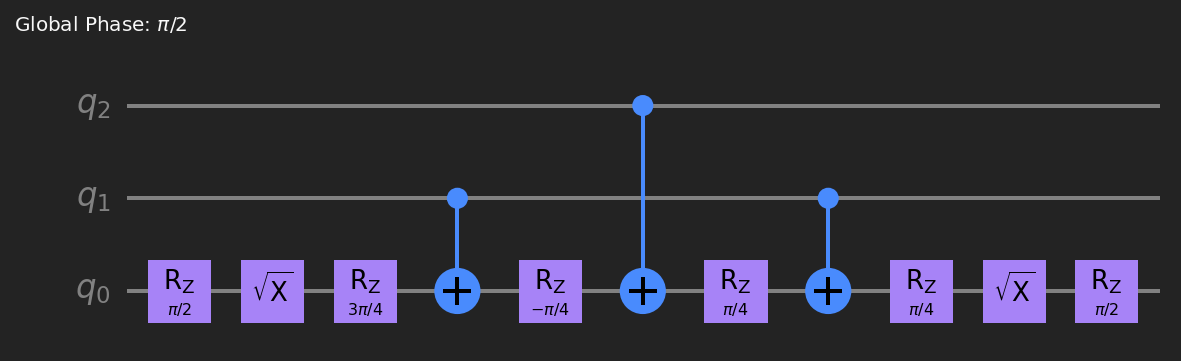

<IPython.core.display.Latex object>

In [22]:
qc = QuantumCircuit(3)
qc.rccx(2,1,0)
display(qc.draw())

qc_t = transpile(qc, basis_gates=['cx', 'sx', 'rz']) # Converts arbitrary circuit to a given basis gate-set
display(qc_t.draw())

Operator(qc).draw('latex', prefix='RCCX = ')

Now, allowing for continuous-valued parameters has limitations in terms of noise robustness and implementation complexity/efficiency in [error-corrected](https://en.wikipedia.org/wiki/Quantum_error_correction) [fault-tolerant](https://en.wikipedia.org/wiki/Threshold_theorem) architectures. Therefore, in the long run, basis gate-sets composed of fixed-angle gates are desirable.

A common set to do this is the Clifford+T gate-set. This set of gates is [universal](https://en.wikipedia.org/wiki/Quantum_logic_gate#Universal_quantum_gates), meaning that it can be used to approximate any unitary up to arbitrary precision. The set is composed by the [Clifford gates](https://en.wikipedia.org/wiki/Clifford_gates) $\{H, S, CX\}$, and the $T$ gate, which we covered in the previous chapter. Clifford gates on their own have been proven to be easy to simulate classically by [Gottesman–Knill theorem](https://en.wikipedia.org/wiki/Gottesman%E2%80%93Knill_theorem) but, surprisingly, adding a $T$ gate enables full quantum-computational power. The reason why this is the case is explained by the [Solovay–Kitaev theorem](https://en.wikipedia.org/wiki/Solovay%E2%80%93Kitaev_theorem), the details of which are outside of the scope of our discussion. 

Here is an example of how a $CCX$ gate can be constructed out of the Clifford+T gate-set:

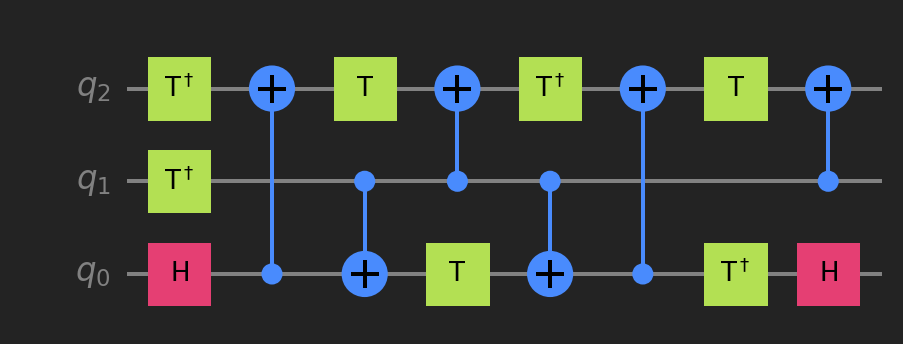

<IPython.core.display.Latex object>

In [23]:
qc = QuantumCircuit(3)
qc.tdg([2,1])
qc.h(0)
qc.cx(0,2)
qc.cx(1,0)
qc.t(2)
qc.cx(1,2)
qc.t(0)
qc.tdg(2)
qc.cx(1,0)
qc.cx(0,2)
qc.t(2)
qc.tdg(0)
qc.cx(1,2)
qc.h(0)
display(qc.draw())
Operator(qc).draw('latex', prefix='CCX = ')

In most error correction architectures, the implementation of a $T$ gate is selected to be the most expensive part of the computation, meaning that it takes a significantly larger number of physical operations to execute a $T$ (or $T^{\dagger}$) gate than a Clifford gate $\{H, CX \} .$ Therefore, minimizing what is known as the $T$-depth of a circuit is usually of great importance. We will discuss the reasons behind this in a later chapter when we discuss error correction and fault-tolerant computing.

The $T$-depth is estimated by "layering" all the $\{T, T^{\dagger} \}$ gates in separate qubits that can be executed in parallel, and counting the total number of these layers. For example, in the circuit above, the first $T$ gate that appears on $q_0$ can be executed in parallel with the $T$ gate on $q_2$, so the total number of $T$-gate layers will be 4. Here is how we can extract the $T$-depth of a circuit in Qiskit:

In [24]:
T_depth = qc.depth(lambda instr: instr.operation.name in ['t', 'tdg'])
print("T-depth of CCX circuit: ", T_depth)

T-depth of CCX circuit:  4


## 3. Multi-Qubit Measurements

### 3.1 Full State Measurement

Just like we did for single qubit states, we compute the probability of measuring one of the possible outcomes for a multi-qubit state by using the Born rule; i.e., by taking the norm squared of the probability amplitude associated with the outcome state of interest. So, for a state of the form:

$$ |q\rangle = \sum_{j=0}^{N-1} \alpha_{j} |j\rangle, $$

the probability of measuring the $j^{th}$ basis state $|j\rangle$ is given by:

$$\mathbb{P}_j = \langle q | \Pi_{j} | q \rangle = |\alpha_j|^2 , \text{ where: } \; \Pi_{j} = | j \rangle \langle j | .$$

If a measurement results in the classical outcome $j$, the quantum state will be projected from the superpositon state $|q\rangle$ shown above, to the basis state $|j\rangle$:

$$ |q'\rangle = \frac{1}{\sqrt{\mathbb{P}_j}} \Pi_{j} |q\rangle .$$

For example, given the superposition state:

$$ |\textit{w}\rangle = \frac{1}{\sqrt{3}}|001\rangle + \frac{i}{\sqrt{3}}|010\rangle - \frac{1}{\sqrt{3}}|100\rangle, $$

The probability of measuring each of the three possible basis states is:

$$
\mathbb{P}_{001} = \left|\frac{1}{\sqrt{3}}\right|^2  = \frac{1}{3}, \quad
\mathbb{P}_{010} = \left|\frac{i}{\sqrt{3}}\right|^2  = \frac{1}{3}, \quad
\mathbb{P}_{100} = \left|\frac{-1}{\sqrt{3}}\right|^2  = \frac{1}{3}.
$$

Furthermore, performing a measurement on superposition state above will project it into only one of the three possible states as:

$$|\textit{w}\rangle = \frac{1}{\sqrt{3}}|001\rangle + \frac{i}{\sqrt{3}}|010\rangle - \frac{1}{\sqrt{3}}|100\rangle \xrightarrow{measure} |\textit{w}'\rangle =
\begin{cases}
|001\rangle \text{, with prob: } \mathbb{P}_{001} \\ \\
|010\rangle \text{, with prob: } \mathbb{P}_{010} \\ \\
|100\rangle \text{, with prob: } \mathbb{P}_{100}
\end{cases}
\\
$$

We can look this example in Qiskit by creating a `Statevector` object and using the `probabilites` method to verify that indeed the array of probabilities we get correspond to the norm square of the probability amplitudes. We can also use the `measure` method to project a superposition state into one of the possible outcomes:

In [25]:
# Create 3-qubit |w⟩ state:
w = np.sqrt(1/3)*(Statevector.from_int(1,8) + 1j*Statevector.from_int(2,8) - Statevector.from_int(4,8))

# Display statevector in vector notation
print('Statevector:')
display(w.draw('latex', prefix='|\\textit{w}\\rangle ='))

# Display statevector in vector notation
print('Probability Amplitudes:')
display(w.draw('latex', convention='vector'))

# Print probabilities of measuring each basis state
probs = w.probabilities()
print('Probabilities:')
display(sp.Matrix(probs).T.applyfunc(sp.nsimplify))

# Measure state once (results differ with every run)
c_result, q_result = w.measure()
print('Single-Measurement Projected State:')
display(q_result)
print('Single-Measurement Classical Outcome:\n')
print(c_result)

Statevector:


<IPython.core.display.Latex object>

Probability Amplitudes:


<IPython.core.display.Latex object>

Probabilities:


Matrix([[0, 1/3, 1/3, 0, 1/3, 0, 0, 0]])

Single-Measurement Projected State:


<IPython.core.display.Latex object>

Single-Measurement Classical Outcome:

100


An alternative to using the `Statevector` class methods described above, we can also create a circuit that prepares the desired state and add measurement blocks to sample its output. We would then need a simulator to execute the circuit and extract its output:

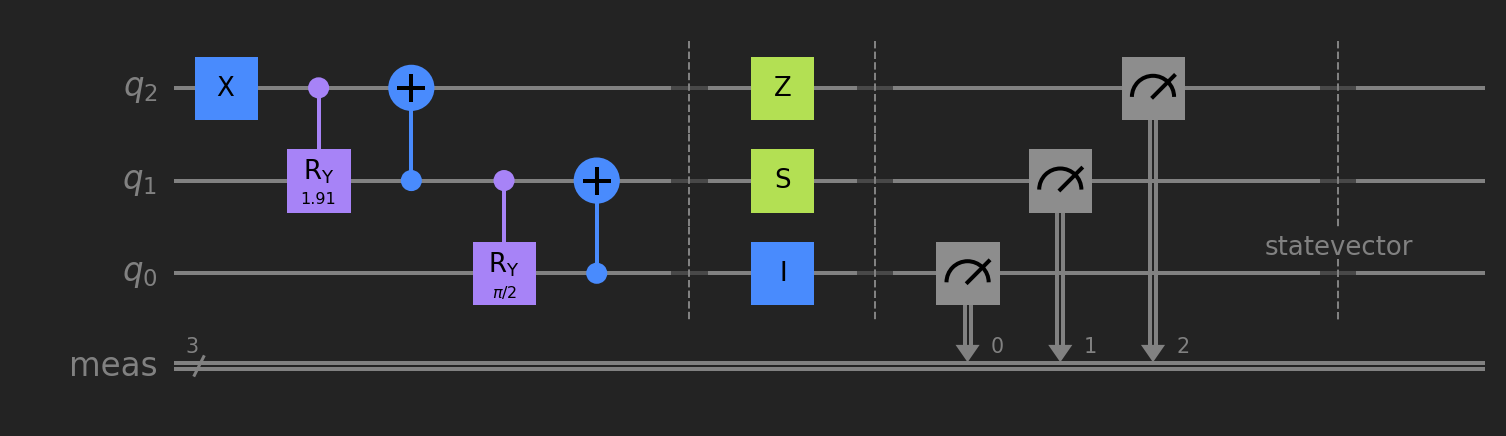

In [26]:
qc = QuantumCircuit(3)

# prepare |w⟩
qc.x(2)
qc.cry(2*np.arccos(np.sqrt(1/3)),2,1)
qc.cx(1,2)
qc.cry(2*np.arccos(np.sqrt(1/2)),1,0)
qc.cx(0,1)
qc.barrier()
qc.z(2)
qc.s(1)
qc.id(0)

# measure all qubits
qc.measure_all()

# Save statevector after performing measurement
qc.save_statevector() 
qc.draw()

In [27]:
from qiskit import transpile
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator

In [28]:
# Run simulation
simulator = AerSimulator()
qc_t = transpile(qc, simulator)
result = simulator.run(qc_t, shots=1000).result()

# Extract projected statevector for one measurement
w_meas = result.get_statevector()
display(w_meas)

<IPython.core.display.Latex object>

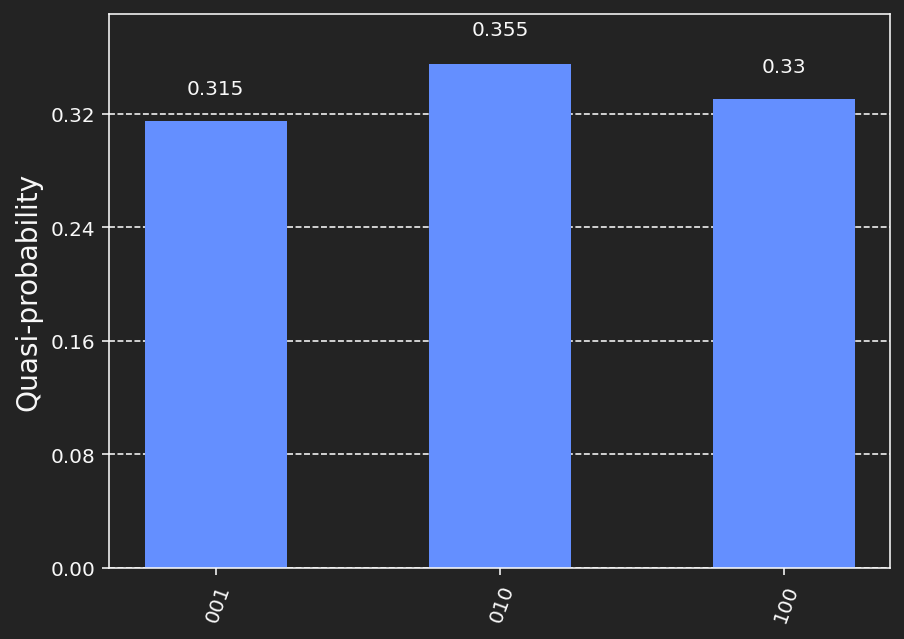

In [29]:
# Extract samples from running circuit 1000 times
counts = result.get_counts()
plot_distribution(counts)

### 3.2 Partial State Measurement

The process described above works well when we are measuring the totality of qubits for a given statevector. However, a couple of interesting questions arise when dealing with multi-qubit systems: 
1. How do we compute the probability of only measuring part of the state? 
2. What would the resulting statevector be after this measurement takes place? 

In other words, what is the procedure to follow if we measure only $m$ qubits out of a system with a total $n$ qubits (where $m < n$)?

The first thing to note is that, we can rewrite the expression for any multi-qubit superposition state as a sum of Kronecker products of the qubits that will be measured (let's call these subsystem $A$), and the ones that will **not** be measured (let's call these subsystem $B$). For example, going back to the $|\textit{w}\rangle$ state we defined above, if we are planning to measure just the least significant qubit, we can rewrite the state as:

$$ |\textit{w}\rangle = \frac{1}{\sqrt{3}}|00\rangle_B \otimes |1\rangle_A + \frac{i}{\sqrt{3}}|01\rangle_B \otimes |0\rangle_A - \frac{1}{\sqrt{3}}|10\rangle_B \otimes |0\rangle_A. $$

Now, since $|0\rangle_A$ appears twice in this expression, we can factorize it to get:

$$ |\textit{w}\rangle = \left( \frac{1}{\sqrt{3}}|00\rangle_B \right) \otimes |1\rangle_A + \left( \frac{i}{\sqrt{3}}|01\rangle_B - \frac{1}{\sqrt{3}}|10\rangle_B \right) \otimes  |0\rangle_A .$$

This makes it clear that, there are two states from subsystem $B$ associated with $|0\rangle_A$, and only one state of $B$ associated with $|1\rangle_A$. So to calculate the probability of individually measuring the outcomes of subsystem $A$, we must add the number of possible ways we can obtain each outcome, weighted by the modulus squared of the corresponding probability amplitudes:

$$ \mathbb{P}^A_0 = \left|\frac{i}{\sqrt{3}} \right|^2 + \left|\frac{-1}{\sqrt{3}} \right|^2 = \frac{2}{3}, \quad \text{ and } \quad  \mathbb{P}^A_1 = \left|\frac{1}{\sqrt{3}} \right|^2 = \frac{1}{3} .$$

From the expression for $|\textit{w}\rangle$, it is also evident that, if a measurement on subsystem $A$ results in $0$, the projected state will be:

$$
\begin{aligned}
|\textit{w}'_0\rangle &= \left( \frac{i}{\sqrt{3}}|01\rangle_B - \frac{1}{\sqrt{3}}|10\rangle_B \right)\otimes  |0\rangle_A 
\\
\\
|\textit{w}'_0\rangle &= \frac{i}{\sqrt{3}}|010\rangle - \frac{1}{\sqrt{3}}|100\rangle.
\end{aligned}
$$

Mathematically, we could extract this statevector by applying the projector operator $\Pi_0$ on subsystem $A$ (to select $|0\rangle_A$), and an identity operator on subsystem $B$ (to leave that portion of the total state unchanged). So, the operator acting on the whole system is:

$$ \Pi_0^A = I_B \otimes \Pi_0, $$

where $I_B = I \otimes I$ (since subsystem $B$ is composed of 2 qubits), we have that:

$$ |\textit{w}'_0\rangle = \Pi_0^A|\textit{w}\rangle .$$

However, an issue with state $|\textit{w}'_0\rangle$ is that it is not properly normalized. This is because the sum of the modulus squared of its probability amplitudes is not equal to $1$. So, to normalize this statevector, we need to divide it by its vector length, which as we saw in the [previous chapter](https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html#kets-bras-products-and-bases), can be computed for $|\textit{w}'_0\rangle$ as:

$$ \|\textit{w}'_0\| = \sqrt{\langle \textit{w}'_0|\textit{w}'_0\rangle}, $$

where:

$$
\begin{aligned}
\langle \textit{w}'_0|\textit{w}'_0\rangle &= \left(\frac{-i}{\sqrt{3}}\langle 010| - \frac{1}{\sqrt{3}}\langle 100| \right)\left(\frac{i}{\sqrt{3}}|010\rangle - \frac{1}{\sqrt{3}}|100\rangle \right)
\\
\\
\langle \textit{w}'_0|\textit{w}'_0\rangle &= \left|\frac{i}{\sqrt{3}}\right|^2 + \left|\frac{-1}{\sqrt{3}}\right|^2
\\
\\
\langle \textit{w}'_0|\textit{w}'_0\rangle &= \frac{2}{3}
\end{aligned}
$$

Upon close inspection, we can see that $\langle \textit{w}'_0|\textit{w}'_0\rangle$ is in fact the same as the probability of measuring $0$ on subsystem $A$ we calculated before:

$$ \mathbb{P}_0^A = \langle \textit{w}'_0|\textit{w}'_0\rangle = \frac{2}{3} ,$$

which we can also write in terms of the original statevector $|\textit{w}\rangle$ and the projection operator as:

$$ \mathbb{P}_0^A = \langle \textit{w}| \Pi_{0}^A |\textit{w}\rangle .$$

So, the equation to calculate the normalized state vector is:

$$ |\textit{w}'_0\rangle = \frac{1}{\sqrt{\mathbb{P}_0^A}} \Pi_{0}^A |\textit{w}\rangle, $$

which will then result in:

$$ 
\begin{aligned}
|\textit{w}'_0\rangle &= \frac{1}{\sqrt{2/3}} \left(\frac{i}{\sqrt{3}}|010\rangle - \frac{1}{\sqrt{3}}|100\rangle \right)
\\
\\
|\textit{w}'_0\rangle &= \frac{i}{\sqrt{2}}|010\rangle - \frac{1}{\sqrt{2}}|100\rangle
\end{aligned}
$$


We can of course do the same for when we measure a $1$ in subsystem $A$. The projected state in this case would be:

$$ |\textit{w}'_1\rangle = \frac{1}{\sqrt{\mathbb{P}_1^A}} \Pi_1^A|\textit{w}\rangle , $$

where:

$$ \Pi_1^A = I_B \otimes \Pi_1 \quad \text{and} \quad \mathbb{P}_1^A = \langle \textit{w}| \Pi_{1}^A |\textit{w}\rangle .$$

Which, again, correctly results in state:

$$|\textit{w}'_1\rangle = |001\rangle. $$

So, given a state $|q\rangle$ with $n$ qubits, if we want to calculate the probabilities and post-measurement statevectors associated with the outcomes of measuring the first $m$ qubits (call this subsystem $A$), we need to define a set of projection operators $\Pi_k^A$, with $k \in [0, 2^m-1]$ of the form:

$$\Pi_k^A = I^{\otimes(n-m)} \otimes \Pi_k , \; \text{ where: } \; \Pi_k = |k\rangle\langle k|.$$

The probability of measuring the $k^{\text{th}}$ basis state of subsystem $A$ is then given by:

$$\mathbb{P}_k^A = \langle q | \Pi_k^A | q \rangle, $$

and the corresponding projected state can be computed as:

$$ |q'\rangle = \frac{1}{\sqrt{\mathbb{P}_k^A}} \Pi_k^A |q\rangle .$$

This procedure can be generalized for when the qubits to be measured are not the fist $m$ qubits of the state by breaking down the projection operator $\Pi_k$ into the individual projection matrices of each qubit, and inserting identity matrices wherever there is a qubit that is not being measured. For example, if we have a system with 5 qubits, and we want to compute the projection operator for measuring a $0$ in qubit $q_0$ and a $1$ in qubit $q_2$, the projection operator for this would be:

$$\Pi_{10}^A = I \otimes I \otimes \Pi_1 \otimes I \otimes \Pi_0 . $$

In Qiskit, it is easy enough to get the probabilities and projection states of a partial measurement by using the same methods we used above, but now specifying which qubits we want to measure. Let's use the same example for the $|\textit{w}\rangle$ state we used before, where we only measure the least significant qubit:

In [30]:
# Create 3-qubit |w⟩ state:
w = np.sqrt(1/3)*(Statevector.from_int(1,8) + 1j*Statevector.from_int(2,8) - Statevector.from_int(4,8))

# Display statevector in vector notation
print('Statevector:')
display(w.draw('latex', prefix='|\\textit{w}\\rangle ='))

# Print probabilities of measuring only the least-significant qubit
probs = w.probabilities([0])
print('Probabilities of measuring 0 or 1 in q0:')
display(sp.Matrix(probs).T.applyfunc(sp.nsimplify))

# Measure least-significant qubit once (results differ with every run)
c_result, q_result = w.measure([0])
print('Single-Measurement Projected State:')
display(q_result)
print('Single-Measurement Classical Outcome:\n')
print(c_result)

Statevector:


<IPython.core.display.Latex object>

Probabilities of measuring 0 or 1 in q0:


Matrix([[2/3, 1/3]])

Single-Measurement Projected State:


<IPython.core.display.Latex object>

Single-Measurement Classical Outcome:

0


And, of course, when dealing with circuits, we can add a measurement block to just the qubits we are interested in measuring:

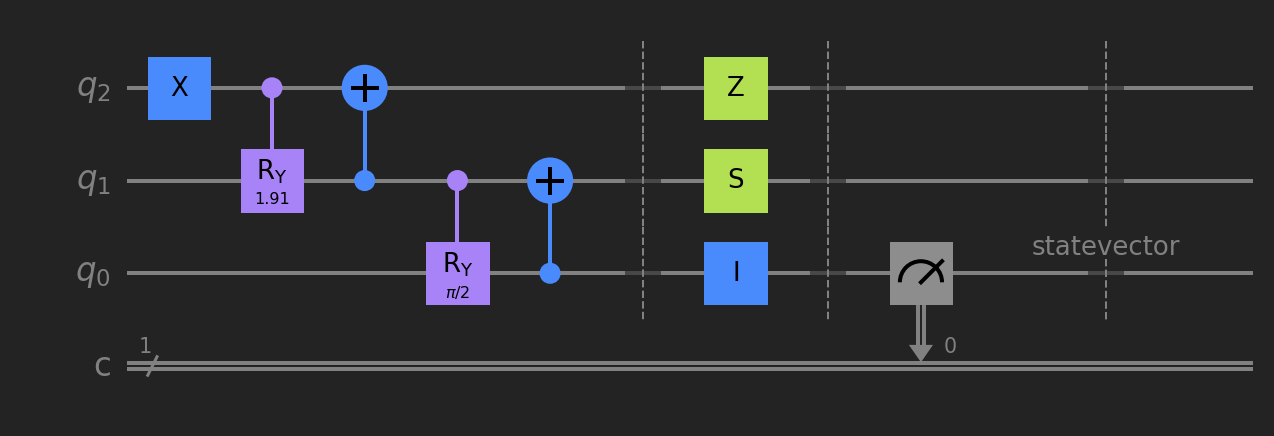

In [31]:
qc = QuantumCircuit(3,1) # Add only one classical register to measure q0

# prepare |w⟩
qc.x(2)
qc.cry(2*np.arccos(np.sqrt(1/3)),2,1)
qc.cx(1,2)
qc.cry(2*np.arccos(np.sqrt(1/2)),1,0)
qc.cx(0,1)
qc.barrier()
qc.z(2)
qc.s(1)
qc.id(0)
qc.barrier()

# measure only qubit 0
qc.measure(0,0)

# Save statevector after performing measurement
qc.save_statevector() 
qc.draw()

In [32]:
# Run simulation
simulator = AerSimulator()
qc_t = transpile(qc, simulator)
result = simulator.run(qc_t, shots=1000).result()

# Extract projected statevector for one measurement
w_meas = result.get_statevector()
display(w_meas)

<IPython.core.display.Latex object>

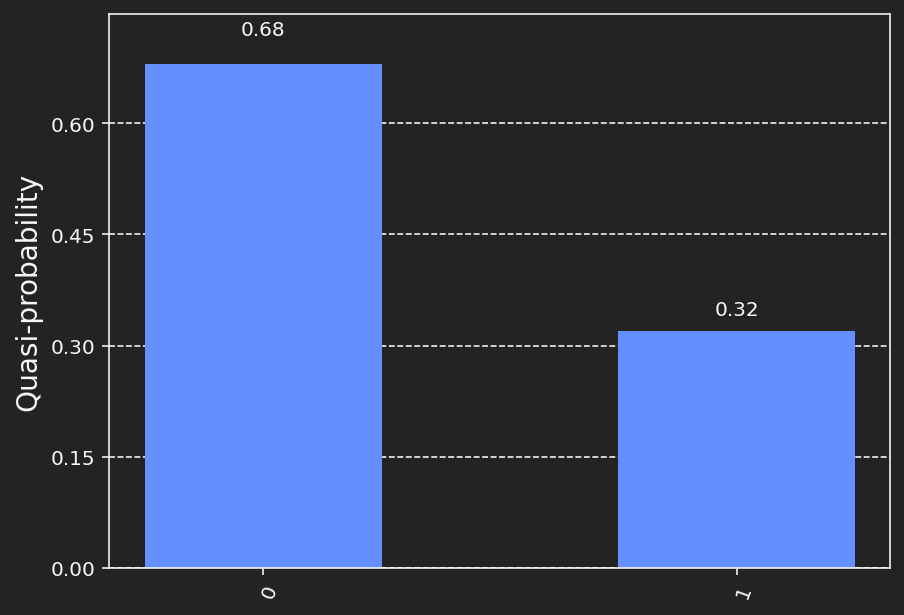

In [33]:
# Extract samples from running circuit 1000 times
counts = result.get_counts()
plot_distribution(counts)